In [1]:
%matplotlib inline

In [2]:
import geopandas as gpd

In [8]:
roads= gpd.read_file('Data/spatial/melbourne_roads.shp')

In [9]:
roads.crs

{'init': 'epsg:3111'}

In [10]:
roads.geometry

0       LINESTRING (2494980.002 2410620.618, 2494989.0...
1       LINESTRING (2497583.080 2410069.269, 2497536.1...
2       LINESTRING (2497626.927 2409961.046, 2497574.9...
3       LINESTRING (2497666.659 2409854.144, 2497614.5...
4       LINESTRING (2496133.981 2409292.636, 2496081.6...
                              ...                        
1543    LINESTRING (2496637.809 2408880.668, 2496658.2...
1544    LINESTRING (2496833.643 2408962.997, 2496836.9...
1545    LINESTRING (2496631.191 2408832.530, 2496679.2...
1546    LINESTRING (2496683.996 2408901.907, 2496711.3...
1547    LINESTRING (2495515.541 2408569.510, 2495546.5...
Name: geometry, Length: 1548, dtype: geometry

In [11]:
from PIL import Image

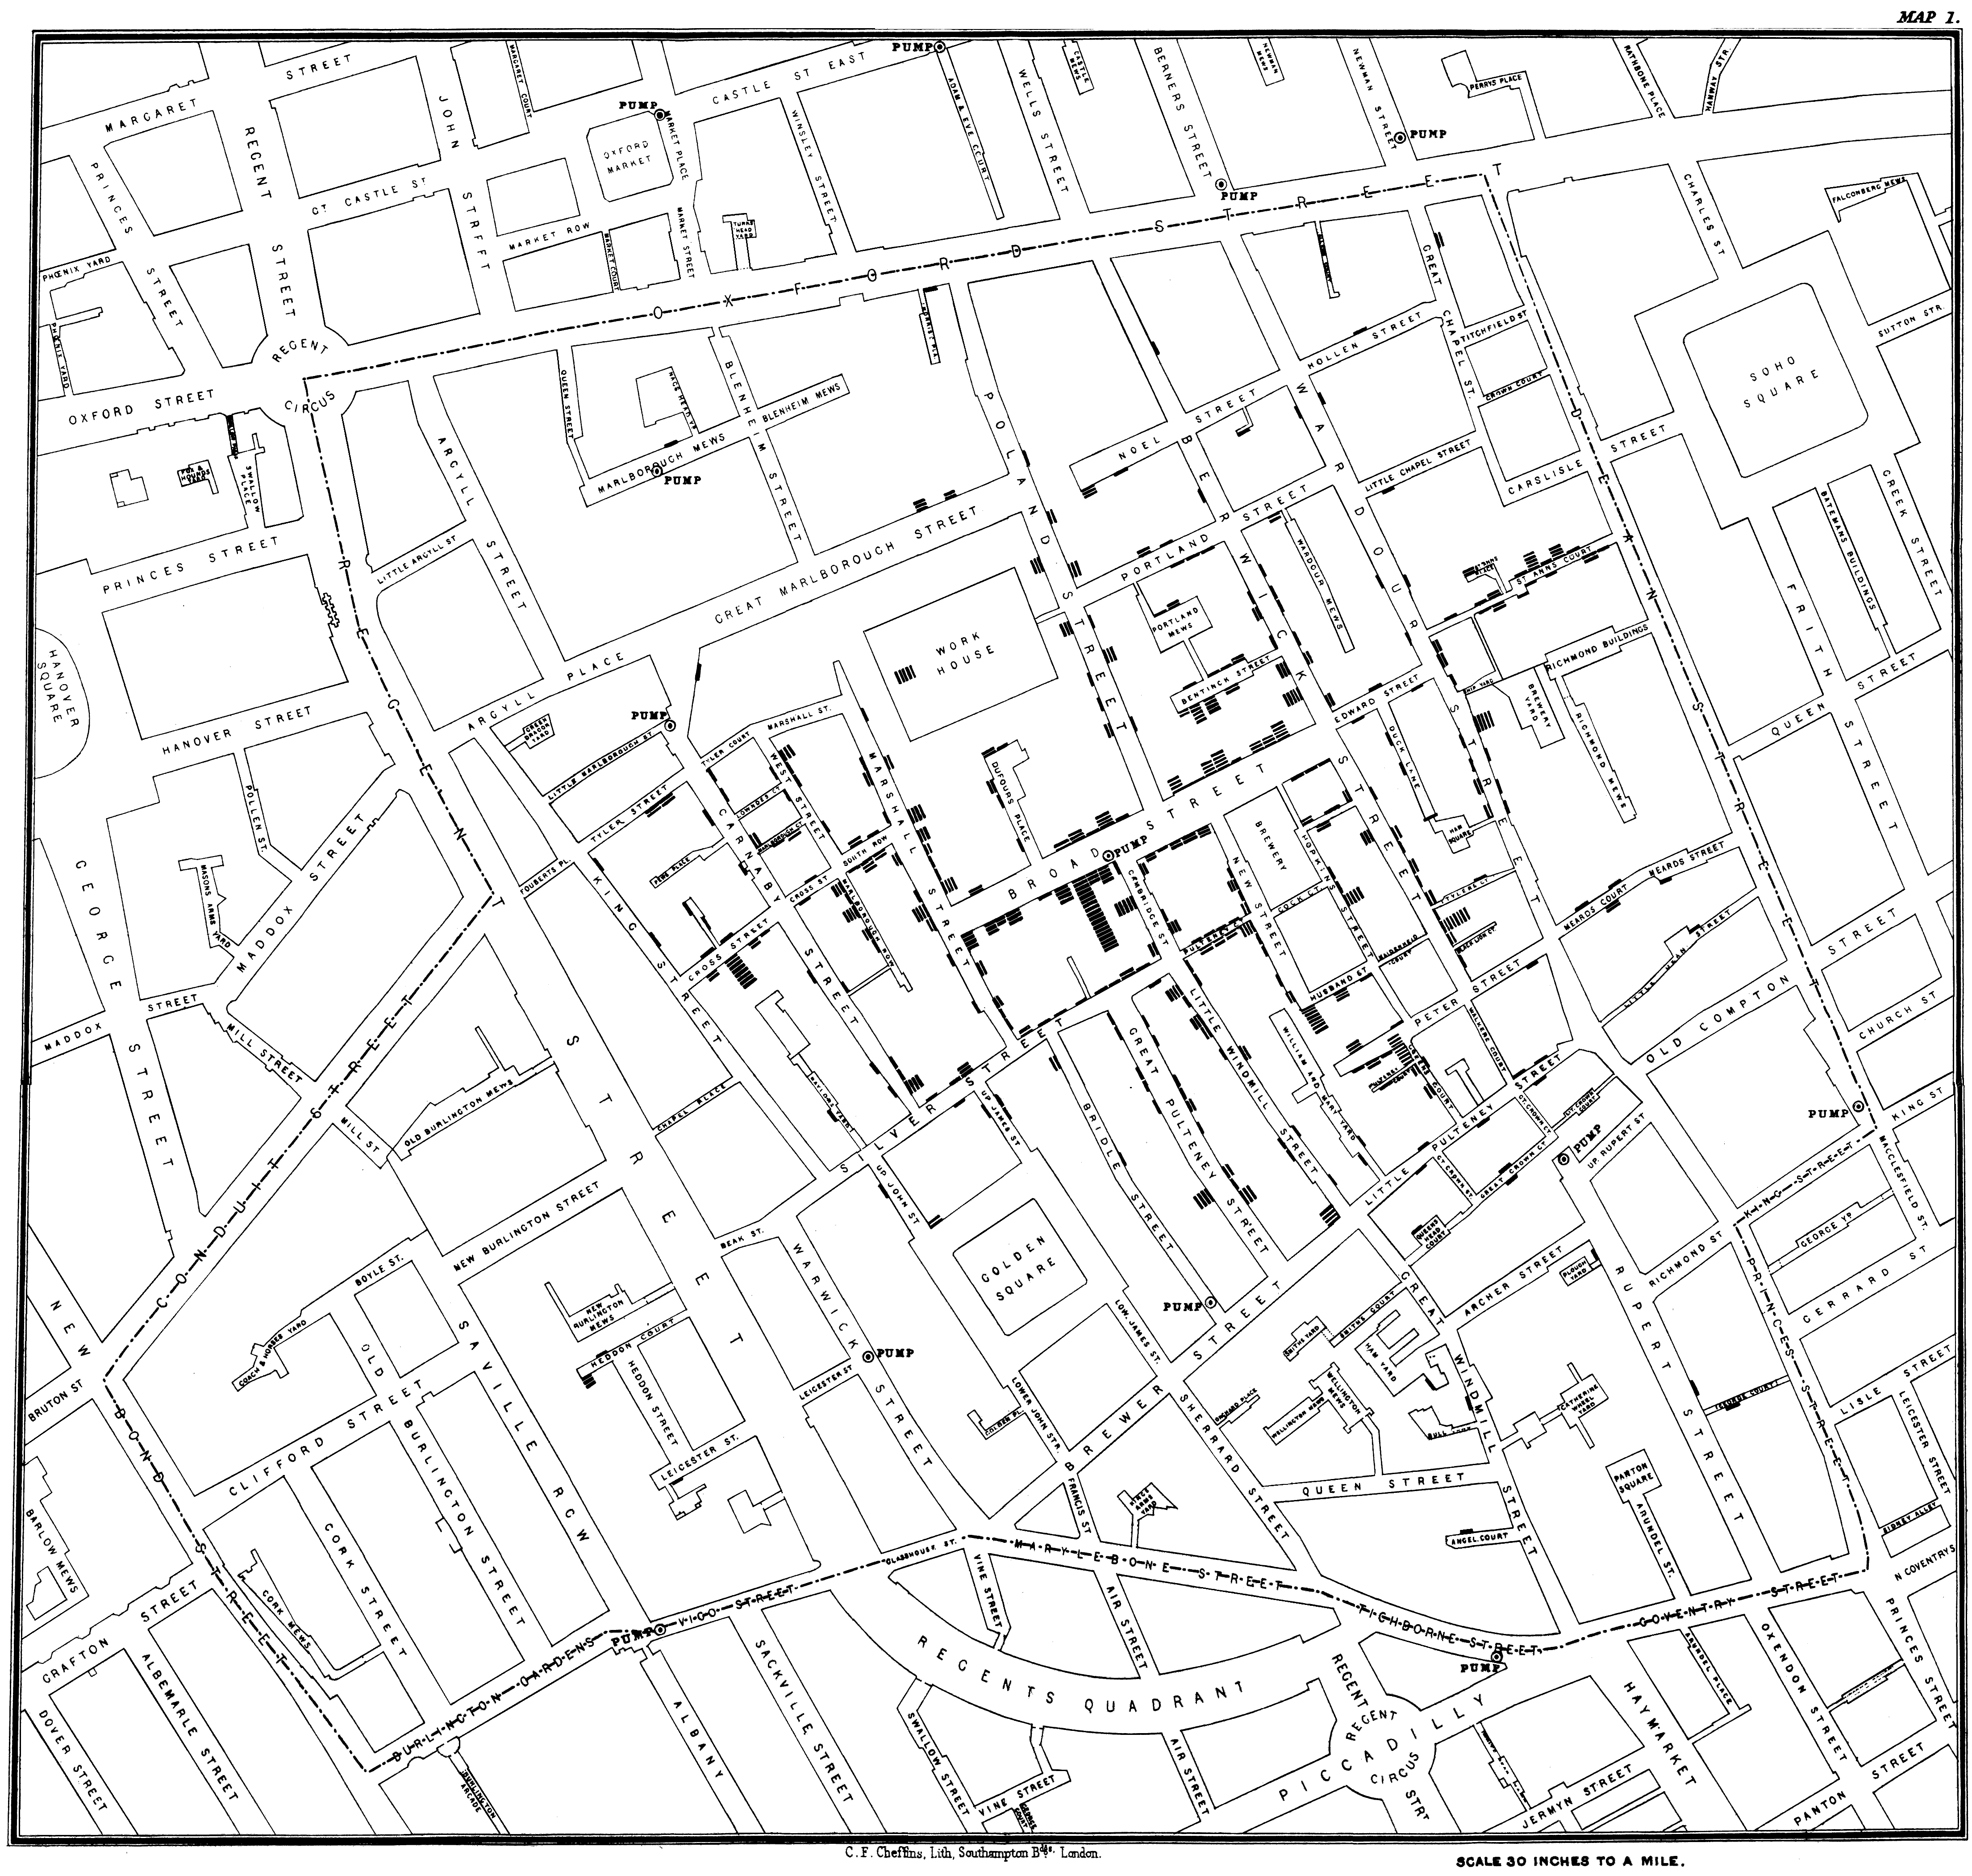

In [12]:
Image.open('Data/spatial/JohnSnow/snow_map.png')

In [13]:
import pandas as pd

In [16]:
pd.read_csv('Data/spatial/JohnSnow/vestry_report.csv')

,Date,No. of Fatal Attacks,Deaths
0,1854/08/19,1,1
1,1854/08/20,1,0
2,1854/08/21,1,2
3,1854/08/22,0,0
4,1854/08/23,1,0
5,1854/08/24,1,2
6,1854/08/25,0,0
7,1854/08/26,1,0
8,1854/08/27,1,1
9,1854/08/28,1,0


In [21]:
deaths= gpd.read_file('Data/spatial/JohnSnow/deaths.shp')

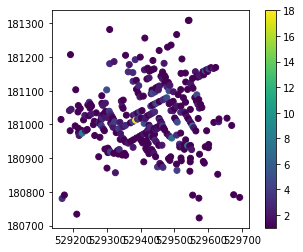

In [22]:
deaths.plot(column= "num_cases", legend=True)

In [23]:
pumps= gpd.read_file('Data/spatial/JohnSnow/pumps.shp')

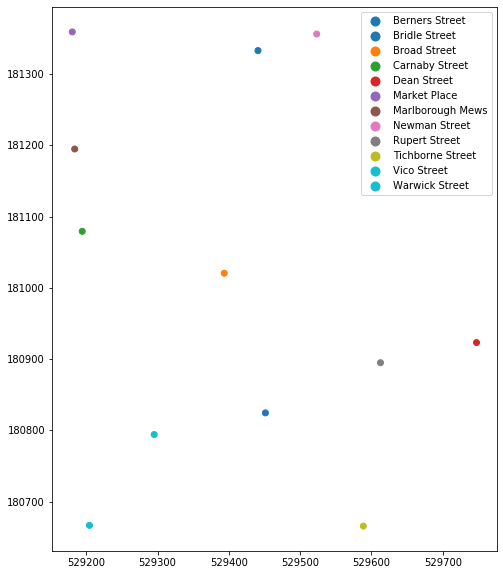

In [26]:
pumps.plot(column= "location", legend=True, figsize =(10,10))

In [28]:
pumps = pumps.set_index('location')

In [29]:
pumps

,fid,id,geometry
location,,,
Broad Street,1.0,1,POINT (529393.499 181020.578)
Market Place,2.0,2,POINT (529180.385 181359.047)
Marlborough Mews,3.0,3,POINT (529183.762 181194.822)
Berners Street,4.0,4,POINT (529440.865 181332.873)
Newman Street,5.0,5,POINT (529523.189 181356.092)
Carnaby Street,6.0,6,POINT (529194.316 181079.324)
Warwick Street,7.0,7,POINT (529295.216 180794.279)
Vico Street,8.0,8,POINT (529204.448 180666.871)
Tichborne Street,9.0,9,POINT (529588.626 180665.860)


In [31]:
point =pumps.loc['Broad Street','geometry']

In [41]:
type(point)

shapely.geometry.point.Point

In [42]:
from shapely import geometry

In [43]:
p2 = geometry.Point(0, 0)

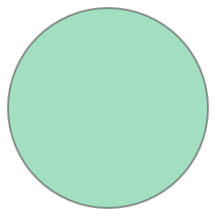

In [44]:
point.buffer(100)

In [45]:
point.distance(p2)

559487.1993629789

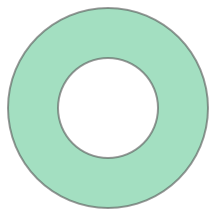

In [46]:
point.buffer(100) - point.buffer(50)

In [47]:
deaths.distance(point)

0      230.323856
1      330.550375
2      318.373074
3      206.450973
4      206.898006
          ...    
317    262.468350
318    277.356567
319    363.519963
320    382.461707
321    140.945485
Length: 322, dtype: float64

In [48]:
pumps.distance(deaths)

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
                    ..
Newman Street      NaN
Rupert Street      NaN
Tichborne Street   NaN
Vico Street        NaN
Warwick Street     NaN
Length: 334, dtype: float64

In [52]:
distances = pumps['geometry'].apply(deaths.distance)

In [56]:
deaths['min distances']=distances.min()

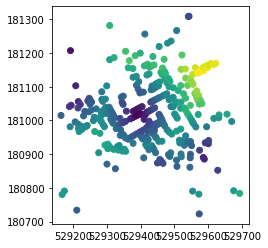

In [57]:
deaths.plot(column='min distances')

### Exercise: Find tht pump closest and calculating the totals

In [58]:
deaths['Idx min distances']=distances.idxmin()

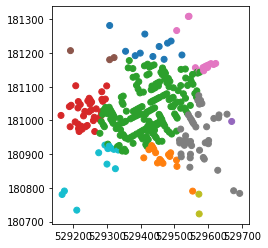

In [59]:
deaths.plot(column='Idx min distances')

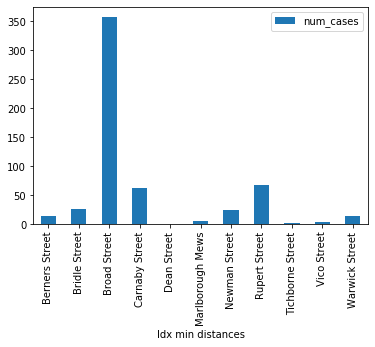

In [63]:
deaths.pivot_table(index='Idx min distances',values='num_cases', aggfunc = 'sum').plot(kind='bar')

In [64]:
import pandas as pd

In [67]:
crashes = pd.read_csv('Data/training_data_BrisbaneCity_engineer_crash.csv', skiprows=5)

In [70]:
crashes.columns

Index(['CRASH_REF_NUMBER', 'CRASH_SEVERITY', 'CRASH_YEAR', 'CRASH_MONTH',
       'CRASH_HOUR', 'CRASH_LONGITUDE_GDA94', 'CRASH_LATITUDE_GDA94',
       'CRASH_STREET', 'CRASH_STREET_INTERSECTING', 'CRASH_SUBURB',
       'CRASH_LOCAL_GOVERNMENT_AREA', 'CRASH_TMR_PDO_REGION',
       'CRASH_TMR_PDO_DISTRICT', 'CRASH_ROADSECTION_AUTHORITY',
       'CRASH_ROADSECTION_ID', 'CRASH_ROADSECTION_NAME',
       'CRASH_ROADSECTION_CARRIAGEWAY', 'CRASH_ROADSECTION_TDIST',
       'CRASH_ROADSECTION_INTERSECTION_ID', 'CRASH_ROADSECTION_AADT_ROAD',
       'CRASH_LANDMARK_DISTANCE', 'CRASH_LANDMARK_UNIT',
       'CRASH_LANDMARK_DIRECTION', 'CRASH_LANDMARK_NAME',
       'CRASH_LANDMARK_AREA', 'CRASH_SPEED_LIMIT_GROUP', 'CRASH_SPEED_LIMIT',
       'CRASH_TYPE', 'CRASH_NATURE', 'CRASH_ROADWAY_FEATURE',
       'CRASH_TRAFFIC_CONTROL', 'CRASH_ROAD_HORIZ_ALIGN',
       'CRASH_ROAD_VERT_ALIGN', 'CRASH_LIGHTING_CONDITION',
       'CRASH_ATMOSPHERIC_CONDITION', 'CRASH_ROAD_SURFACE_CONDITION',
       'CRASH_DCA_KE

In [71]:
xy_columns = ['CRASH_LONGITUDE_GDA94', 'CRASH_LATITUDE_GDA94']

In [72]:
crashes[xy_columns]

,CRASH_LONGITUDE_GDA94,CRASH_LATITUDE_GDA94
0,153.034217,-27.456971
1,153.036235,-27.457239
2,153.038067,-27.455376
3,153.037834,-27.453423
4,153.039052,-27.454378
...,...,...
227,153.037834,-27.453423
228,153.033674,-27.453915
229,153.039052,-27.454378
230,153.033877,-27.457228


In [73]:
row= crashes.loc[0,xy_columns]

In [74]:
row

CRASH_LONGITUDE_GDA94    153.034
CRASH_LATITUDE_GDA94     -27.457
Name: 0, dtype: object

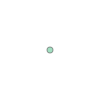

In [75]:
geometry.Point(row)

In [80]:
crashes[xy_columns].apply(geometry.Point, axis='columns')

0      POINT (153.034217 -27.456971)
1      POINT (153.036235 -27.457239)
2      POINT (153.038067 -27.455376)
3      POINT (153.037834 -27.453423)
4      POINT (153.039052 -27.454378)
                   ...              
227    POINT (153.037834 -27.453423)
228    POINT (153.033674 -27.453915)
229    POINT (153.039052 -27.454378)
230    POINT (153.033877 -27.457228)
231     POINT (153.03888 -27.454552)
Length: 232, dtype: object

In [81]:
crashes['geometry']=gpd.GeoSeries(
    crashes[xy_columns].apply(geometry.Point, axis='columns')
)

In [83]:
crashes = gpd.GeoDataFrame(
    crashes,
    geometry ='geometry',
    crs={'int':'epsg:4283'})

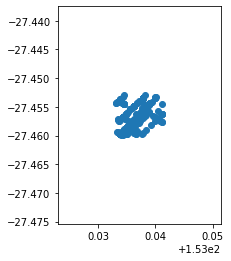

In [84]:
crashes.plot()